In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('advertising11.csv')

In [4]:
data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

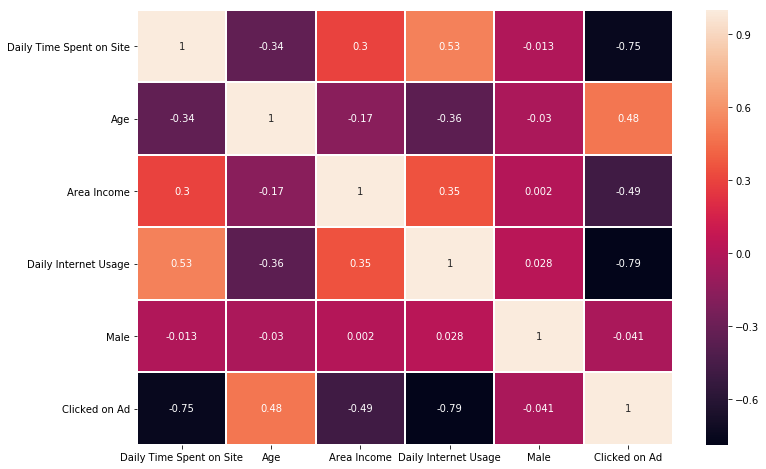

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,linecolor='w',linewidths='1')
plt.savefig("1st.png")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
Daily Time Spent on Site    900 non-null float64
Age                         900 non-null int64
Area Income                 900 non-null float64
Daily Internet Usage        900 non-null float64
Ad Topic Line               900 non-null object
City                        900 non-null object
Male                        900 non-null int64
Country                     900 non-null object
Timestamp                   900 non-null object
Clicked on Ad               900 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 70.4+ KB


In [8]:
training_data = data[["Daily Time Spent on Site", 'Age', 'Area Income','Daily Internet Usage', 'Male']]


In [9]:
output_data = data["Clicked on Ad"]

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(training_data,output_data,test_size=0.30,random_state=42)


In [12]:
from sklearn.linear_model import LogisticRegression


In [13]:
model = LogisticRegression()
model.fit(X_train,Y_train)


C:\Users\SAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
predictions = model.predict(X_test)


In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [16]:
confusion=confusion_matrix(predictions,Y_test)
score=accuracy_score(predictions,Y_test)
classification=classification_report(Y_test,predictions)


In [17]:
confusion


array([[122,  24],
       [  9, 115]], dtype=int64)

In [18]:
score

0.8777777777777778

In [19]:
classification

'              precision    recall  f1-score   support\n\n           0       0.84      0.93      0.88       131\n           1       0.93      0.83      0.87       139\n\n   micro avg       0.88      0.88      0.88       270\n   macro avg       0.88      0.88      0.88       270\nweighted avg       0.88      0.88      0.88       270\n'

### Age histogram

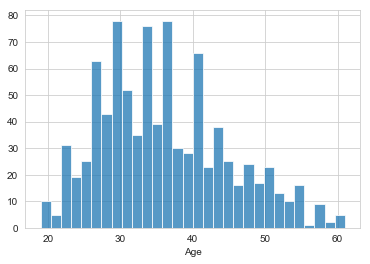

In [20]:
sns.set_style('whitegrid')
sns.distplot(data['Age'],kde=False,bins=30,hist_kws={"alpha":0.75})
plt.savefig("2nd.png")

# How 'Country' affects the user advertisement click

In [21]:
new_data=pd.crosstab(data['Country'], data['Clicked on Ad'])

In [22]:
new_data[:5]

Clicked on Ad,0,1
Country,,
Afghanistan,2,5
Albania,3,3
Algeria,3,3
American Samoa,2,3
Andorra,0,2


In [23]:
new_data['total']=new_data.sum(axis=1)

In [24]:
new_data.head(10)

Clicked on Ad,0,1,total
Country,,,
Afghanistan,2,5,7
Albania,3,3,6
Algeria,3,3,6
American Samoa,2,3,5
Andorra,0,2,2
Angola,3,1,4
Anguilla,3,3,6
Antarctica (the territory South of 60 deg S),1,2,3
Antigua and Barbuda,1,4,5


In [25]:
percent_data=new_data.apply(lambda x:round(100 *x/new_data['total']))

In [26]:
percent_data[:5]

Clicked on Ad,0,1,total
Country,,,
Afghanistan,29.0,71.0,100.0
Albania,50.0,50.0,100.0
Algeria,50.0,50.0,100.0
American Samoa,40.0,60.0,100.0
Andorra,0.0,100.0,100.0


In [27]:
percent_data.drop('total',axis=1,inplace=True)

In [28]:
percent_data = percent_data[percent_data[1] > 80]

In [29]:
percent_data = percent_data.sort_values(1, ascending=False)

In [30]:
percent_data.shape[0]

30

In [31]:
import matplotlib.pyplot as plt

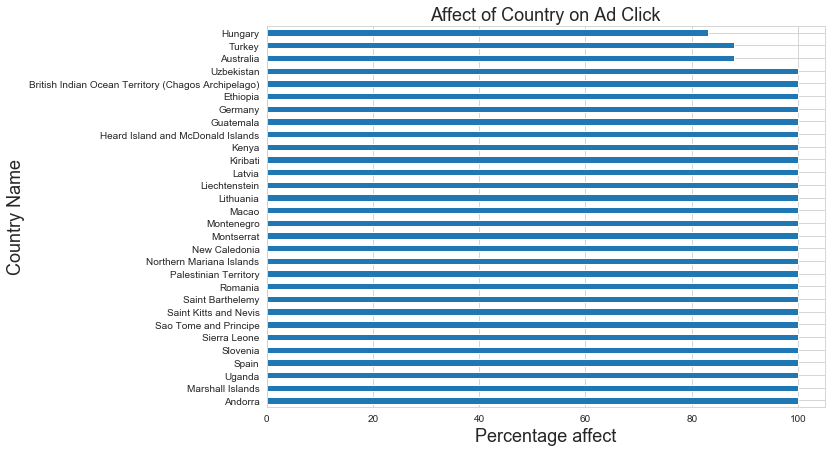

In [58]:
plt.figure(figsize=(10, 7))
percent_data[1].plot(kind='barh')
plt.xlabel('Percentage affect',fontdict=font1)
plt.ylabel('Country Name',fontdict=font1)
plt.title('Affect of Country on Ad Click',fontdict=font1)
plt.savefig("3rd.png")

# How 'gender' affects the user advertisement click.

In [33]:
gender_data = pd.crosstab(data['Male'], data['Clicked on Ad'])

In [34]:
gender_data

Clicked on Ad,0,1
Male,,
0,229,236
1,232,203


In [35]:
gender_data['total'] = gender_data.sum(axis=1)

In [36]:
gender_data

Clicked on Ad,0,1,total
Male,,,
0,229,236,465
1,232,203,435


In [37]:
percentage_share = gender_data.apply(lambda x:round(100 * x/gender_data['total']))

In [38]:
percentage_share

Clicked on Ad,0,1,total
Male,,,
0,49.0,51.0,100.0
1,53.0,47.0,100.0


In [39]:
percentage_share.drop('total', axis=1, inplace=True)

In [40]:
font={
    'size':34
}

<Figure size 360x360 with 0 Axes>

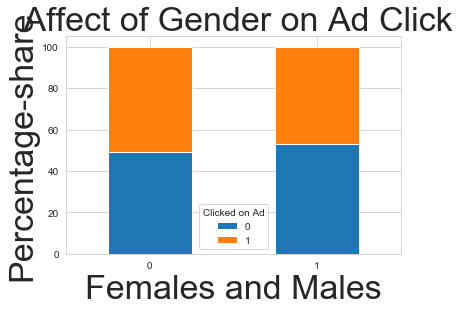

In [57]:
plt.figure(figsize=(5,5))
percentage_share.plot(kind='bar', stacked=True)
plt.xlabel('Females and Males',fontdict=font)
plt.ylabel('Percentage-share',fontdict=font)
plt.xticks(rotation=0)
plt.title(' Affect of Gender on Ad Click', fontdict=font)
plt.savefig("4th.png")


### Overall females tend to click on a Ad more often than males.

# How 'daily internet usage' affects the user advertisement click.

In [42]:
font1={'size':18}

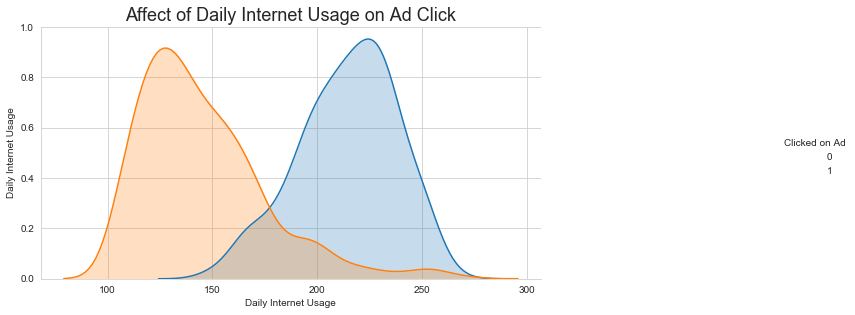

In [43]:
g=sns.pairplot(data,hue="Clicked on Ad",vars=['Daily Internet Usage'])
g.fig.set_figheight(5)
g.fig.set_figwidth(15)
plt.title('Affect of Daily Internet Usage on Ad Click',fontdict=font1)
plt.savefig("5th.png")


# How 'Age' affects the user advertisement click.

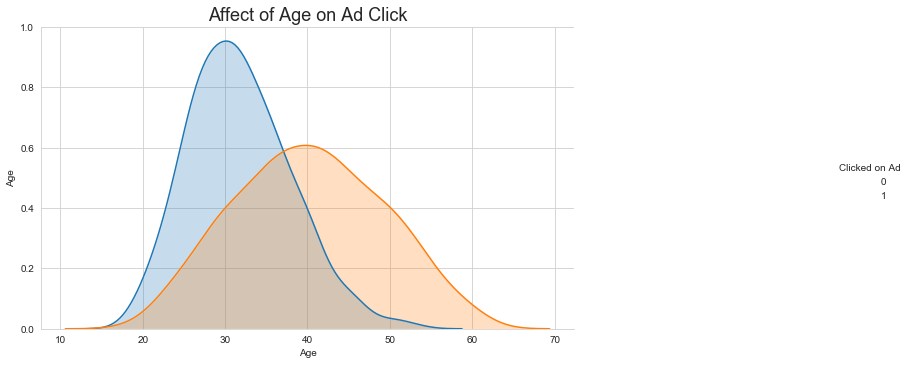

In [44]:
g=sns.pairplot(data,hue="Clicked on Ad",vars=['Age'])
g.fig.set_figheight(6)
g.fig.set_figwidth(16)
plt.title('Affect of Age on Ad Click',fontdict=font1)
plt.savefig("6th.png")


In [45]:
test_data=pd.read_csv('test11.csv')

In [46]:
test_data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp
0,50.78,51,49957.00,122.04,Vision-oriented asynchronous Internet solution,West David,0,Liberia,11/02/2016 17:02
1,40.47,38,24078.93,203.90,Sharable 5thgeneration access,Fraziershire,0,Burundi,22/07/2016 7:44


In [47]:
test_data=test_data[["Daily Time Spent on Site", 'Age', 'Area Income','Daily Internet Usage', 'Male']]

In [48]:
test_predictions=model.predict(test_data)

In [49]:
test_predictions_df= {
    'Daily Time Spent on Site' : test_data['Daily Time Spent on Site'],
    'Clicked on Ad':test_predictions
}

In [50]:
test_predictions_df=pd.DataFrame(test_predictions_df)

In [51]:
test_predictions_df=test_predictions_df.set_index('Daily Time Spent on Site' )

In [52]:
test_predictions_df.head(2)

,Clicked on Ad
Daily Time Spent on Site,
50.78,1
40.47,1


In [53]:
test_predictions_df.to_csv('Prediction.csv')